<a href="https://colab.research.google.com/github/1503-ng/An-lises-de-Dataframes-em-cursos-e-individualmente-/blob/master/estudo_corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd



# O intuito dessa análise, de pegar esse dataframe para estudo era entender de onde vieram a maior parte das infecções do COVID-19 na China, o maior percentual de idade de pessoas que vieram a falecer ou adquiriram a doença.

In [71]:


df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/patient.xlsx')
df.head()


,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released


#Fazendo a alteração dos nomes das colunas para melhor entendimento 

In [72]:
df = df.rename(columns={
    'patient_id':'paciente_id',
     'sex':'sexo',
     'birth_year':'ano_que_nasceu',
     'country':'pais',
     'region': 'regiao',
      'disease':'doenca',
      'group':'grupo',
      'infection_reason':'causa_da_infeccao',
      'infection_order':'ordem_de_infeccao',
      'infected_by':'infectado_por',
      'contact_number':'numero_de_contato',
      'confirmed_date':'data_de_confirmacao',
      'released_date':'data_de_liberacao',
      'deceased_date':'data_de_falecimento',
      'state':'estado'})
df

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated


In [73]:
df.columns

Index(['paciente_id', 'sexo', 'ano_que_nasceu', 'pais', 'regiao', 'doenca',
       'grupo', 'causa_da_infeccao', 'ordem_de_infeccao', 'infectado_por',
       'numero_de_contato', 'data_de_confirmacao', 'data_de_liberacao',
       'data_de_falecimento', 'estado'],
      dtype='object')

In [74]:
df.head()

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released


In [75]:
df.shape

(7869, 15)

In [76]:
df.isna().sum()

paciente_id               0
sexo                   7190
ano_que_nasceu         7203
pais                      0
regiao                 7432
doenca                 7841
grupo                  7783
causa_da_infeccao      7715
ordem_de_infeccao      7833
infectado_por          7799
numero_de_contato      7816
data_de_confirmacao       0
data_de_liberacao      7813
data_de_falecimento    7833
estado                    0
dtype: int64

In [78]:
df['doenca'].value_counts()


1.0    28
Name: doenca, dtype: int64

#Limpeza de dados 

**Removendo colunas que possuem um grande número de ausência de dados ou que não trarão muita relevância para a analise.**


In [0]:
df.drop('doenca', axis=1, inplace=True)

In [0]:
df.drop('grupo', axis=1, inplace=True)

In [0]:
df.drop('numero_de_contato', axis=1, inplace=True)

In [0]:
df.drop('infectado_por', axis=1, inplace=True)

In [0]:
df.drop('ordem_de_infeccao', axis=1, inplace=True)

In [0]:
df.drop('data_de_falecimento', axis=1, inplace=True)

In [100]:
df.shape

(7869, 10)

In [101]:
df.head(20)

,paciente_id,sexo,ano_que_nasceu,pais,regiao,causa_da_infeccao,data_de_confirmacao,data_de_liberacao,estado,idade
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,2020-01-20,2020-02-06,released,36.0
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,2020-01-24,2020-02-05,released,56.0
2,3,male,1966.0,Korea,capital area,visit to Wuhan,2020-01-26,2020-02-12,released,54.0
3,4,male,1964.0,Korea,capital area,visit to Wuhan,2020-01-27,2020-02-09,released,56.0
4,5,male,1987.0,Korea,capital area,visit to Wuhan,2020-01-30,2020-03-02,released,33.0
5,6,male,1964.0,Korea,capital area,contact with patient,2020-01-30,2020-02-19,released,56.0
6,7,male,1991.0,Korea,capital area,visit to Wuhan,2020-01-30,2020-02-15,released,29.0
7,8,female,1957.0,Korea,Jeollabuk-do,visit to Wuhan,2020-01-31,2020-02-12,released,63.0
8,9,female,1992.0,Korea,capital area,contact with patient,2020-01-31,2020-02-24,released,28.0
9,10,female,1966.0,Korea,capital area,contact with patient,2020-01-31,2020-02-19,released,54.0


In [102]:
df.isna().sum()

paciente_id               0
sexo                   7190
ano_que_nasceu         7203
pais                      0
regiao                 7432
causa_da_infeccao      7715
data_de_confirmacao       0
data_de_liberacao      7813
estado                    0
idade                  7203
dtype: int64

In [103]:
df['ano_que_nasceu'].value_counts()


1985.0    26
1995.0    24
1992.0    21
1962.0    18
1969.0    18
          ..
1939.0     1
1930.0     1
2007.0     1
1933.0     1
2001.0     1
Name: ano_que_nasceu, Length: 81, dtype: int64

In [0]:
df['ano_que_nasceu'].fillna('ND', inplace=True)

In [110]:
df['sexo'].value_counts()


female    393
male      286
Name: sexo, dtype: int64

In [0]:
df['sexo'].fillna('Indefinido', inplace=True)

In [0]:
df['regiao'].fillna('S/R', inplace=True)

In [0]:
df['causa_da_infeccao'].fillna('sem info', inplace=True)

In [0]:
df['data_de_liberacao'].fillna('S/I', inplace=True)

In [0]:
df['idade'].fillna('sem registro', inplace=True)

In [119]:
df.isna().sum()

paciente_id            0
sexo                   0
ano_que_nasceu         0
pais                   0
regiao                 0
causa_da_infeccao      0
data_de_confirmacao    0
data_de_liberacao      0
estado                 0
idade                  0
dtype: int64

#Aqui queria saber qual a idade das pessoas que tiveram casos confirmados para entender se existe algum padrão.

In [83]:
idade = 2020 - (df['ano_que_nasceu'])
idade

df['idade']= idade
print(df)

      paciente_id    sexo  ano_que_nasceu  ... data_de_falecimento    estado idade
0               1  female          1984.0  ...                 NaT  released  36.0
1               2    male          1964.0  ...                 NaT  released  56.0
2               3    male          1966.0  ...                 NaT  released  54.0
3               4    male          1964.0  ...                 NaT  released  56.0
4               5    male          1987.0  ...                 NaT  released  33.0
...           ...     ...             ...  ...                 ...       ...   ...
7864         7865     NaN             NaN  ...                 NaT  isolated   NaN
7865         7866     NaN             NaN  ...                 NaT  isolated   NaN
7866         7867     NaN             NaN  ...                 NaT  isolated   NaN
7867         7868     NaN             NaN  ...                 NaT  isolated   NaN
7868         7869     NaN             NaN  ...                 NaT  isolated   NaN

[78

In [143]:
##homens registrados = 286#

df[df.sexo == 'male'] 



,paciente_id,sexo,ano_que_nasceu,pais,regiao,causa_da_infeccao,data_de_confirmacao,data_de_liberacao,estado,idade
1,2,male,1964,Korea,filtered at airport,visit to Wuhan,2020-01-24,2020-02-05 00:00:00,released,56
2,3,male,1966,Korea,capital area,visit to Wuhan,2020-01-26,2020-02-12 00:00:00,released,54
3,4,male,1964,Korea,capital area,visit to Wuhan,2020-01-27,2020-02-09 00:00:00,released,56
4,5,male,1987,Korea,capital area,visit to Wuhan,2020-01-30,2020-03-02 00:00:00,released,33
5,6,male,1964,Korea,capital area,contact with patient,2020-01-30,2020-02-19 00:00:00,released,56
...,...,...,...,...,...,...,...,...,...,...
5459,5460,male,1940,Korea,Gyeongsangbuk-do,sem info,2020-03-04,S/I,deceased,80
5533,5534,male,1974,Korea,Jeju-do,visit to Daegu,2020-03-04,S/I,isolated,46
5580,5581,male,2013,Korea,capital area,contact with patient,2020-03-04,S/I,isolated,7
5766,5767,male,1938,Korea,Daegu,sem info,2020-03-05,S/I,deceased,82


In [144]:
df[df.sexo == 'female']


,paciente_id,sexo,ano_que_nasceu,pais,regiao,causa_da_infeccao,data_de_confirmacao,data_de_liberacao,estado,idade
0,1,female,1984,China,filtered at airport,visit to Wuhan,2020-01-20,2020-02-06 00:00:00,released,36
7,8,female,1957,Korea,Jeollabuk-do,visit to Wuhan,2020-01-31,2020-02-12 00:00:00,released,63
8,9,female,1992,Korea,capital area,contact with patient,2020-01-31,2020-02-24 00:00:00,released,28
9,10,female,1966,Korea,capital area,contact with patient,2020-01-31,2020-02-19 00:00:00,released,54
13,14,female,1980,China,capital area,contact with patient,2020-02-02,2020-02-18 00:00:00,released,40
...,...,...,...,...,...,...,...,...,...,...
4891,4892,female,2009,Korea,capital area,sem info,2020-03-03,S/I,isolated,11
5025,5026,female,1973,Korea,capital area,sem info,2020-03-03,S/I,isolated,47
5172,5173,female,1974,Korea,capital area,sem info,2020-03-03,S/I,isolated,46
5767,5768,female,1935,Korea,Gyeongsangbuk-do,sem info,2020-03-05,S/I,deceased,85


In [148]:
#quantas pessoas possuem sexo indefinido? 7190 #

df[(df.sexo != 'female') & (df.sexo != 'male')]



,paciente_id,sexo,ano_que_nasceu,pais,regiao,causa_da_infeccao,data_de_confirmacao,data_de_liberacao,estado,idade
91,92,Indefinido,ND,Korea,S/R,sem info,2020-02-20,S/I,isolated,sem registro
92,93,Indefinido,ND,Korea,S/R,sem info,2020-02-20,S/I,isolated,sem registro
93,94,Indefinido,ND,Korea,S/R,sem info,2020-02-20,S/I,isolated,sem registro
94,95,Indefinido,ND,Korea,S/R,sem info,2020-02-20,S/I,isolated,sem registro
95,96,Indefinido,ND,Korea,S/R,sem info,2020-02-20,S/I,isolated,sem registro
...,...,...,...,...,...,...,...,...,...,...
7864,7865,Indefinido,ND,Korea,S/R,sem info,2020-03-11,S/I,isolated,sem registro
7865,7866,Indefinido,ND,Korea,S/R,sem info,2020-03-11,S/I,isolated,sem registro
7866,7867,Indefinido,ND,Korea,S/R,sem info,2020-03-11,S/I,isolated,sem registro
7867,7868,Indefinido,ND,Korea,S/R,sem info,2020-03-11,S/I,isolated,sem registro


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df.describe(include='all')

,paciente_id,sexo,ano_que_nasceu,pais,regiao,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado,idade
count,7869.000000,679,666.000000,7869,437,154,36.000000,70.000000,53.000000,7869,56,36,7869,666.000000
unique,NaN,2,NaN,3,14,14,NaN,NaN,NaN,37,21,16,3,NaN
top,NaN,female,NaN,Korea,capital area,contact with patient,NaN,NaN,NaN,2020-03-01 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,isolated,NaN
freq,NaN,393,NaN,7860,191,76,NaN,NaN,NaN,1062,11,6,7777,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-20 00:00:00,2020-02-05 00:00:00,2020-02-19 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11 00:00:00,2020-03-07 00:00:00,2020-03-09 00:00:00,NaN,NaN
mean,3935.000000,NaN,1974.271772,NaN,NaN,NaN,4.277778,379.000000,67.849057,NaN,NaN,NaN,NaN,45.728228
std,2271.728967,NaN,17.423250,NaN,NaN,NaN,12.032364,540.247528,177.723575,NaN,NaN,NaN,NaN,17.423250
min,1.000000,NaN,1929.000000,NaN,NaN,NaN,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,2.000000
25%,1968.000000,NaN,1962.000000,NaN,NaN,NaN,1.000000,29.250000,3.000000,NaN,NaN,NaN,NaN,30.000000


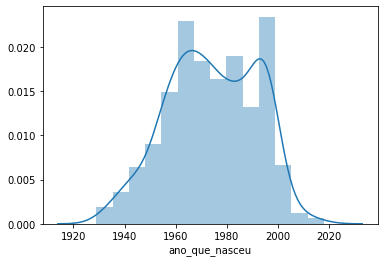

In [89]:
sns.distplot(df['ano_que_nasceu'])

In [90]:
df[df.pais == 'Korea']
coreia= df[df.pais == 'Korea' ]
coreia

,paciente_id,sexo,ano_que_nasceu,pais,regiao,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado,idade
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0
2,3,male,1966.0,Korea,capital area,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0
3,4,male,1964.0,Korea,capital area,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0
4,5,male,1987.0,Korea,capital area,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,33.0
5,6,male,1964.0,Korea,capital area,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaT,released,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated,NaN
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated,NaN
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated,NaN
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaT,NaT,isolated,NaN
